<Axes: xlabel='date'>

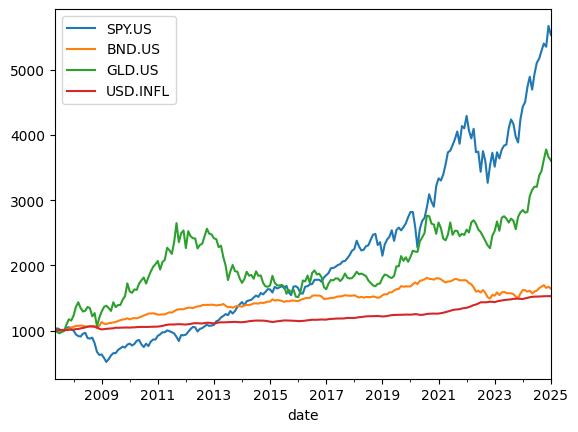

In [1]:
import okama as ok

x = ok.AssetList(['SPY.US', 'BND.US', 'GLD.US'], ccy='USD')

x.wealth_indexes.plot()

In [3]:
import okama as ok
import matplotlib.pyplot as plt

# Example assets and weights
assets = ['T.US', 'XOM.US', 'FRE.XFRA', 'SNW.XFRA', 'LKOH.MOEX']
weights = [0.3, 0.2, 0.2, 0.2, 0.1]  # Must sum to 1.0

# # Create a portfolio with monthly rebalancing
# pf = ok.Portfolio(
#     assets=assets,
#     weights=weights,    
#     ccy='EUR',
#     rebalancing_period='month',  # 'Q' for quarterly, 'A' for annual, etc.
#     first_date='2003-09',    # pick a reasonable start date (earliest is 2003-09 from initial assessment)
#     last_date='2020-12'       # pick an end date to evaluate
# )

# Create a portfolio with monthly rebalancing
pf = ok.Portfolio(
    assets=assets,
    weights=weights,    
    ccy='EUR',
    rebalancing_period='month',  # 'Q' for quarterly, 'A' for annual, etc.
    first_date='2018-12',    # pick a reasonable start date (earliest is 2003-09 from initial assessment)
    last_date='2024-12'       # pick an end date to evaluate
)

In [7]:
# extract return
def extract_return(wealth_index, start_date, end_date):
    return wealth_index.loc[end_date, wealth_index.columns[0]] / wealth_index.loc[start_date, wealth_index.columns[0]] - 1

start_date = "2019-01"
end_date = "2024-12"

ret = extract_return(pf.wealth_index, start_date, end_date)

print(f"Start date: {start_date}")
print(f"End date: {end_date}")
print(f"Return: {ret * 100:.2f}%")

Start date: 2019-01
End date: 2024-12
Return: 77.38%


In [53]:
pf.wealth_index.loc["2015-01"]
pf.wealth_index

,portfolio_2429.PF,EUR.INFL
date,,
2003-09,1000.000000,1000.000000
2003-10,990.253696,1004.000000
2003-11,1014.839675,1005.004000
2003-12,1004.871138,1005.004000
2004-01,1065.425196,1008.019012
...,...,...
2020-08,4443.704008,1291.226998
2020-09,4281.223659,1286.062090
2020-10,4094.108532,1287.348152


In [14]:
# dir(pf)
help(pf)
# pf.stats()
# pf.describe()

Help on Portfolio in module okama.portfolio object:

class Portfolio(okama.common.make_asset_list.ListMaker)
 |  Portfolio(assets: Optional[List[str]] = None, *, first_date: Optional[str] = None, last_date: Optional[str] = None, ccy: str = 'USD', inflation: bool = True, weights: Optional[List[float]] = None, rebalancing_period: str = 'month', symbol: str = None)
 |  
 |  Implementation of investment portfolio.
 |  
 |  Investments portfolio is a type of financial asset (same as stocks, ETF, mutual funds, currencies etc.).
 |  Arguments are similar to AssetList, however Portfolio additionally has:
 |  
 |  - weights
 |  - rebalancing_period
 |  - symbol
 |  
 |  Portfolio is defined by the investment strategy, which includes:
 |  - asset allocation (financial assets and their proportions in the portfolio)
 |  - the rebalancing strategy (`rebalancing_period` parameter)
 |  
 |  The rebalancing is the action of bringing the portfolio that has deviated away
 |  from original target asset a